![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [208]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [209]:
# Here you run your code to explore the data
!ls data/zippedData

bom.movie_gross.csv          imdb.title.principals.csv.gz
bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz


## IMPORT ALL DATA

In [210]:
#Box Office Mojo Data (bom)
bom_moviegross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

#IMDB Data (imdb)
imdb_name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz') 
imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

#Rotten Tomatoes Data (rt). 
#rt_movie_info_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep = '/t', encoding = 'windows-1254')
#rt_reviews_df =  pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep = '/t', encoding = 'windows-1254')

#The Movie Database (tmdb)
tmdb_movies_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

#The Numbers (tn)
tn_movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

## Preview DataFrames

In [211]:
bom_moviegross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [212]:
#imdb_name_basics.head()

In [213]:
# imdb_title_akas_df.head()

In [214]:
# imdb_title_basics_df.head()

In [215]:
# imdb_title_crew_df.head()

In [216]:
# imdb_title_principals_df.head()

In [217]:
# imdb_title_ratings_df.head()

In [218]:
# rt_move_info_df.head()

In [219]:
#rt_reviews_df.head()

In [220]:
#tmdb_movies_df.head()

In [221]:
# tn_movie_budgets_df.head()

## Check for missing values

In [222]:
bom_moviegross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [223]:
#imdb_name_basics.isna().sum()

In [224]:
#imdb_title_akas_df.isna().sum()

In [225]:
#imdb_title_basics_df.isna().sum()

In [226]:
#imdb_title_crew_df.isna().sum()

In [227]:
#imdb_title_principals_df.isna().sum()

In [228]:
#imdb_title_ratings_df.isna().sum()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [229]:
# Here you run your code to clean the data

## Box Office Mojo Data

In [230]:
bom_moviegross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [231]:
bom_moviegross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [232]:
bom_moviegross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [233]:
bom_moviegross_df['foreign_gross'].shape

(3387,)

Let's find the percentage of data that is null!

In [234]:
num_missing_bom_foreigngross = bom_moviegross_df.isna().sum()['foreign_gross']
total_moviegross_entries = len(bom_moviegross_df['foreign_gross'])
percentage_missing_foreign = num_missing_bom_foreigngross / total_moviegross_entries
print(percentage_missing_foreign)

0.3985828166519043


Hmmmmm, so 40% of the data for the 'foreign_gross' column is missing and classified as a NaN. 

Let's dig a little deeper.

In [235]:
len(list(bom_moviegross_df['foreign_gross'].unique()))

1205

There are 1205 unique values in this series. What type of data are they?

In [236]:
non_standard = []
for x in list(bom_moviegross_df['foreign_gross'].unique()):
    if type(x) != int and type(x) != float:
        non_standard.append(x)
    else:
        pass

In [237]:
len(non_standard)

1204

In [238]:
[type(x) for x in non_standard if type(x) != str] #All the unique values are strings

[]

Let's summarize what we have so far:
    
    3387 total entries
    1350 null values
    1204 str type values

This leaves:
    
    833 int/float type values

Let's convert every item in this series to float in order to remove the 'str' types

In [239]:
foreign_gross_numeric = pd.to_numeric(bom_moviegross_df['foreign_gross'], errors = 'coerce', downcast = 'float') #Converted from str, int, float to float

In [240]:
foreign_gross_numeric.describe()

count         2032.0
mean      75056992.0
std      137529312.0
min            600.0
25%        3775000.0
50%       18900000.0
75%       75050000.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [241]:
bom_moviegross_df['foreign_gross'] = foreign_gross_numeric #Assigned new series in place of original df series

In [242]:
bom_moviegross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [243]:
bom_moviegross_df['foreign_gross'].describe()

count         2032.0
mean      75056992.0
std      137529312.0
min            600.0
25%        3775000.0
50%       18900000.0
75%       75050000.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [244]:
mean_adjusted = bom_moviegross_df['foreign_gross'].fillna(75057048)

In [245]:
mean_adjusted.describe()

count         3387.0
mean      75056264.0
std      106514032.0
min            600.0
25%       11750000.0
50%       75057048.0
75%       75057048.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [246]:
mean_adjusted_removed = bom_moviegross_df[(bom_moviegross_df['foreign_gross'] > 1000000) & (bom_moviegross_df['domestic_gross'] > 1000000)]

In [247]:
mean_adjusted_removed.shape

(1358, 5)

In [248]:
mean_adjusted_removed.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Let's just remove everything that doesn't have a domestic gross value

In [249]:
mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)

<ipython-input-249-d442058cf311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)


In [250]:
mean_adjusted_removed

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3252,Papillon (2018),BST,2300000.0,2200000.0,2018
3257,Don't Worry He Won't Get Far on Foot,Amazon,1400000.0,2500000.0,2018
3258,A Private War,Aviron,1600000.0,2200000.0,2018
3263,The Front Runner,Sony,2000000.0,1200000.0,2018


In [251]:
mean_adjusted_removed.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Let's drop the columns that I will not be using

In [252]:
mean_adjusted_removed.drop('year', axis=1, inplace=True)

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [253]:
mean_adjusted_removed.drop('studio', axis=1, inplace=True)

In [254]:
mean_adjusted_removed

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691299968.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300032.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0
...,...,...,...
3252,Papillon (2018),2300000.0,2200000.0
3257,Don't Worry He Won't Get Far on Foot,1400000.0,2500000.0
3258,A Private War,1600000.0,2200000.0
3263,The Front Runner,2000000.0,1200000.0


In [255]:
final_moviegross_df = mean_adjusted_removed

In [256]:
final_moviegross_df['total_gross'] = final_moviegross_df['domestic_gross'] + final_moviegross_df['foreign_gross']

<ipython-input-256-11f84f9550d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_moviegross_df['total_gross'] = final_moviegross_df['domestic_gross'] + final_moviegross_df['foreign_gross']


In [257]:
final_moviegross_df

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691299968.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300032.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3252,Papillon (2018),2300000.0,2200000.0,4.500000e+06
3257,Don't Worry He Won't Get Far on Foot,1400000.0,2500000.0,3.900000e+06
3258,A Private War,1600000.0,2200000.0,3.800000e+06
3263,The Front Runner,2000000.0,1200000.0,3.200000e+06


## IMDB Title_basics data

Let's clean the imdb_title_basics_df

In [258]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [259]:
imdb_title_index = imdb_title_basics_df.set_index('primary_title')

In [260]:
imdb_title_index

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
Kuambil Lagi Hatiku,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka,tt9916706,Dankyavar Danka,2013,NaN,Comedy


In [261]:
imdb_title_basics_df.shape

(146144, 6)

In [262]:
imdb_title_index_dropped = imdb_title_index.drop('tconst', axis=1)

In [263]:
imdb_title_index_dropped

,original_title,start_year,runtime_minutes,genres
primary_title,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [264]:
imdb_title_index_removedna = imdb_title_index_dropped.dropna(axis=0, how = 'any')

In [265]:
imdb_title_index_removedna

,original_title,start_year,runtime_minutes,genres
primary_title,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...
Drømmeland,Drømmeland,2019,72.0,Documentary
The Rehearsal,O Ensaio,2019,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary


In [266]:
dropped_imdb_title = imdb_title_index_removedna.drop(['original_title', 'start_year'], axis=1)

In [267]:
dropped_imdb_title

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy
...,...,...
Drømmeland,72.0,Documentary
The Rehearsal,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,84.0,Documentary


In [268]:
final_imdb_title_df = dropped_imdb_title

In [269]:
final_imdb_title_df

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy
...,...,...
Drømmeland,72.0,Documentary
The Rehearsal,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,84.0,Documentary


Here are the two DataFrames we have so far:

In [270]:
final_imdb_title_df

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy
...,...,...
Drømmeland,72.0,Documentary
The Rehearsal,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,84.0,Documentary


In [271]:
final_moviegross_df

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691299968.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300032.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3252,Papillon (2018),2300000.0,2200000.0,4.500000e+06
3257,Don't Worry He Won't Get Far on Foot,1400000.0,2500000.0,3.900000e+06
3258,A Private War,1600000.0,2200000.0,3.800000e+06
3263,The Front Runner,2000000.0,1200000.0,3.200000e+06


## tn_movie_budgets_df

In [272]:
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [273]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].map(lambda x: x.lstrip('$'))

In [274]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].map(lambda x: x.lstrip('$'))

In [275]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].map(lambda x: x.lstrip('$'))

In [276]:
## Change datatype from str to int for columns "Production_Budget", "domestic_gross", and "worldwide_gross"
tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"] = tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"].replace(",","", regex=True).astype(int)

In [277]:
#rename column name for tn_movie_budgets_df (Prepare to Merge)
tn_movie_budgets_df.rename(columns = {'movie':"primary_title"}, inplace = True)
tn_movie_budgets_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [278]:
#rename column name for tn_movie_budgets_df (Prepare to Merge)
final_imdb_title_df.rename(columns = {'primary_title':"title"}, inplace = True)
final_imdb_title_df.head()

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy


In [279]:
# merging the cleaned dataframes
final_df = tn_movie_budgets_df.merge(final_imdb_title_df, on= 'primary_title', how= 'inner')
final_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi"


In [280]:
#Add total_gross column to the final_df
final_df["total_gross"] = final_df["domestic_gross"] + final_df["worldwide_gross"]
final_df["total_profit"] = final_df["total_gross"] - final_df["production_budget"]
# final_df will be the main dataframe we will use to analyze our data.
final_df.tail()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,total_gross,total_profit
3304,67,"Apr 28, 2006",Clean,10000,138711,138711,70.0,"Comedy,Drama,Horror",277422,267422
3305,68,"Jul 6, 2001",Cure,10000,94596,94596,93.0,Drama,189192,179192
3306,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,95.0,"Comedy,Drama",9168,168
3307,78,"Dec 31, 2018",Red 11,7000,0,0,77.0,"Horror,Sci-Fi,Thriller",0,-7000
3308,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,76.0,"Drama,Horror,Thriller",0,-1400


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Question to Answer: What is the optimal movie runtime for each genre?
Since there are too many types of genres, we need to clean up its data

In [281]:
## Copy final_df dataframe into genres dataframe
genres = final_df.copy()

## Separate genres column and create genre1, genre2, genre3 with respective value.
genres[['genre1', 'genre2', 'genre3']] = final_df['genres'].str.split(',', expand=True)
genres.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,total_gross,total_profit,genre1,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,3536852904,3111852904,Horror,None,None
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",1286727750,876127750,Action,Adventure,Fantasy
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",192524700,-157475300,Action,Adventure,Sci-Fi
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",1862019831,1531419831,Action,Adventure,Sci-Fi
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",2726949682,2426949682,Action,Adventure,Sci-Fi


In [282]:
## Remove unnecessary columns, and combine all the data from genre1, genre2 genre3 column into one single column.

genres_a = genres[["primary_title","production_budget","total_profit","runtime_minutes","genre1"]]
genres_a.columns = ["primary_title","production_budget","total_profit","runtime_minutes","genre1"]

genres_b = genres[["primary_title","production_budget","total_profit","runtime_minutes","genre2"]]
genres_b.columns = ["primary_title","production_budget","total_profit","runtime_minutes","genre1"]

genres_c = genres[["primary_title","production_budget","total_profit","runtime_minutes","genre3"]]
genres_c.columns = ["primary_title","production_budget","total_profit","runtime_minutes","genre1"]

In [283]:
## Create a new dataframe with cleaned up data. 
runtime_df = pd.concat([genres_a, genres_b, genres_c], axis=0)
## Change column name genre1 to genre
runtime_df = runtime_df.rename(columns = {"genre1" : "genre"})

In [284]:
## runtime_df["genre"].value_counts()

In [285]:
## Remove all the rows where count of genre is less than 150. (data with less than 150 counts can be misleading)
genre_counts = runtime_df["genre"].value_counts()
to_remove = genre_counts[genre_counts < 351].index

## Set up a new dataframe to be used for optimal runtime data
## We are left with the data containing Top 8 Genres
runtime_df = runtime_df[~runtime_df.genre.isin(to_remove)]


In [286]:
## Find out minimum & maximum value in 
runtime_df["runtime_minutes"].describe()

## Set up runtime_minutes count dataframe to visualize abundancy of each runtime.
runtime_counts = runtime_df["runtime_minutes"].value_counts().reset_index()
runtime_counts.columns = ["runtime_minutes", "count"]

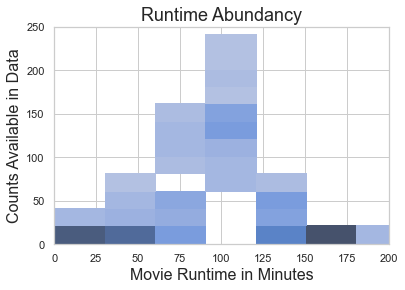

In [287]:
## Visualize Rutime Abundancy on our runtime_df dataframe.

## Create a histogram to visualize abundancy of movies' running time
ax = sns.histplot(x = runtime_counts["runtime_minutes"], y = runtime_counts["count"])

## Set Figure size and Colors
sns.set(rc={'figure.figsize':(22,15)})
sns.set_theme(style="whitegrid")

## Set title to labels and graph.
ax.set_title("Runtime Abundancy", size = 18)
ax.set_xlabel("Movie Runtime in Minutes", size = 16)
ax.set_ylabel("Counts Available in Data", size = 16)

## Set limits to x and y axis
ax.set(xlim = (0,200))
ax.set(ylim = (0,250));

Based on this Runtime Abundancy Scatter Plot, we can visulize two important aspects:
   1. Movie runtime is most abundant in the runtime range between 80 minutes to 120 minutes.
   2. Count of movies drastically fades movies with runtime less than 50 minutes.
   3. Count of movies drastically fades movies with runtime more than 150 minutes.

We can come up 10 sets of reasonable movie run_time indexes below based off abundancy.

In [288]:
## Set up a dataframe with the 10 indexes shown below.
for i, x in zip(runtime_df["runtime_minutes"], range(len(runtime_df["runtime_minutes"]) + 1)):
    if i < 50:
        runtime_df["runtime_minutes"].iloc[x] = "less than 50"
    elif i >= 50 and i < 70:
         runtime_df["runtime_minutes"].iloc[x] = "50 to 69"   
    elif i >= 70 and i < 80:
         runtime_df["runtime_minutes"].iloc[x] = "70 to 79"
    elif i >= 80 and i < 90:
         runtime_df["runtime_minutes"].iloc[x] = "80 to 89"
    elif i >= 90 and i < 100:
         runtime_df["runtime_minutes"].iloc[x] = "90 to 99"
    elif i >= 100 and i < 110:
        runtime_df["runtime_minutes"].iloc[x] = "100 to 109"
    elif i >= 110 and i < 120:
        runtime_df["runtime_minutes"].iloc[x] = "110 to 119"
    elif i >= 120 and i < 130:
        runtime_df["runtime_minutes"].iloc[x] = "120 to 129"
    elif i >= 130 and i <= 150:
        runtime_df["runtime_minutes"].iloc[x] = "130 to 150"
    else:
        runtime_df["runtime_minutes"].iloc[x] = "greater than 150"

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [289]:
## runtime_df.loc[runtime_df["runtime"] == "greater than 150"

In [290]:
## Obtain % Profit data on the runtime_df dataframe in int type.
runtime_df["% Profit"] = (runtime_df["total_profit"] / runtime_df["production_budget"]) * 100
runtime_df["% Profit"] = runtime_df["% Profit"].astype(int)
runtime_df["Count"] = 1
runtime_df.head()

,primary_title,production_budget,total_profit,runtime_minutes,genre,% Profit,Count
0,Avatar,425000000,3111852904,90 to 99,Horror,732,1
1,Pirates of the Caribbean: On Stranger Tides,410600000,876127750,130 to 150,Action,213,1
2,Dark Phoenix,350000000,-157475300,110 to 119,Action,-44,1
3,Avengers: Age of Ultron,330600000,1531419831,130 to 150,Action,463,1
4,Avengers: Infinity War,300000000,2426949682,130 to 150,Action,808,1


In [291]:
## Group By Genre, Runtime_minuts then mean of % Profit
runtime_df_agg = pd.pivot_table(runtime_df, values = ["% Profit", "Count"], index = ["genre", "runtime_minutes"],
                                aggfunc= {"% Profit": np.mean,
                                          "Count": np.sum})

## Remove index to make it easier to work with.
runtime_df_agg = runtime_df_agg.reset_index()

## Remove all the rows where count is less than 10 which could be misleading.
runtime_df_agg = runtime_df_agg[runtime_df_agg['Count'] > 10]

In [292]:
## Group By Genre, Runtime_minuts then median of % Profit
runtime_df_agg_med = pd.pivot_table(runtime_df, values = ["% Profit", "Count"], index = ["genre", "runtime_minutes"],
                                aggfunc= {"% Profit": np.median,
                                          "Count": np.sum})

## Remove index to make it easier to work with.
runtime_df_agg_med = runtime_df_agg_med.reset_index()

## Remove all the rows where count is less than 10 which could be misleading.
runtime_df_agg_med = runtime_df_agg_med[runtime_df_agg_med['Count'] > 10]

In [293]:
runtime_df_agg
runtime_df_agg_med

,genre,runtime_minutes,% Profit,Count
0,Action,100 to 109,214.0,129
1,Action,110 to 119,164.0,113
2,Action,120 to 129,194.5,76
3,Action,130 to 150,355.0,85
6,Action,80 to 89,34.0,55
7,Action,90 to 99,44.0,145
8,Action,greater than 150,237.0,23
10,Adventure,100 to 109,246.0,99
11,Adventure,110 to 119,222.0,62
12,Adventure,120 to 129,195.0,60


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Analysis on Movie running time vs. profit for Top 8 Genres

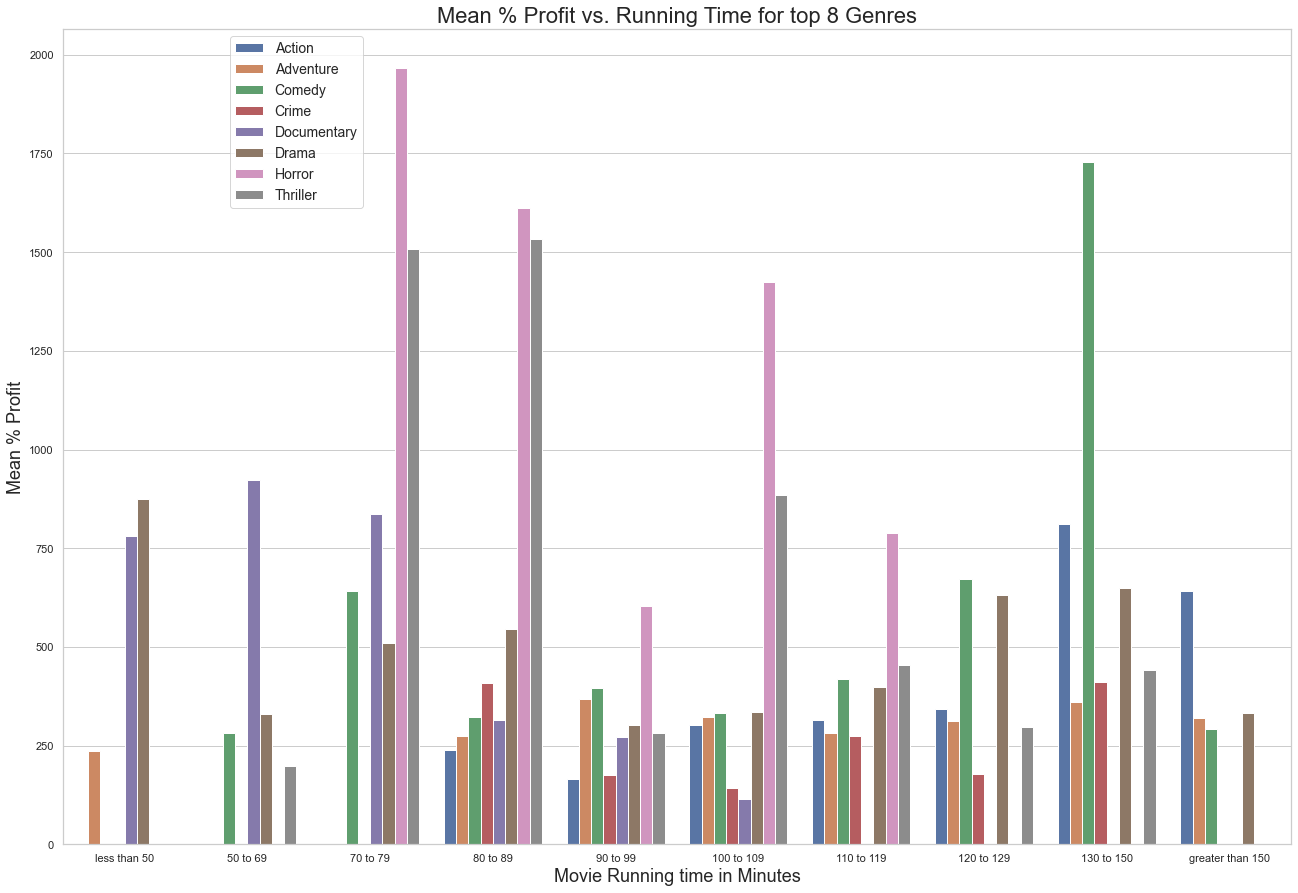

In [294]:
## Show Bar Plot Comparison to vividly depict most profitable running time for each genre. (For Mean % Profit)
ax2 = sns.barplot(x='runtime_minutes', y='% Profit', hue='genre',
                  order = ["less than 50", "50 to 69", "70 to 79", "80 to 89", "90 to 99", "100 to 109"
                     , "110 to 119", "120 to 129", "130 to 150", "greater than 150"],
                    data=runtime_df_agg)
sns.set(rc={'figure.figsize':(22,15), 'figure.facecolor':'white'})
sns.set_theme(style="whitegrid")
ax2.set_title("Mean % Profit vs. Running Time for top 8 Genres", size = 22)
ax2.set_xlabel("Movie Running time in Minutes", size = 18)
ax2.set_ylabel("Mean % Profit", size = 18);
ax2.legend(bbox_to_anchor= (0.13, 1), fontsize = 14);

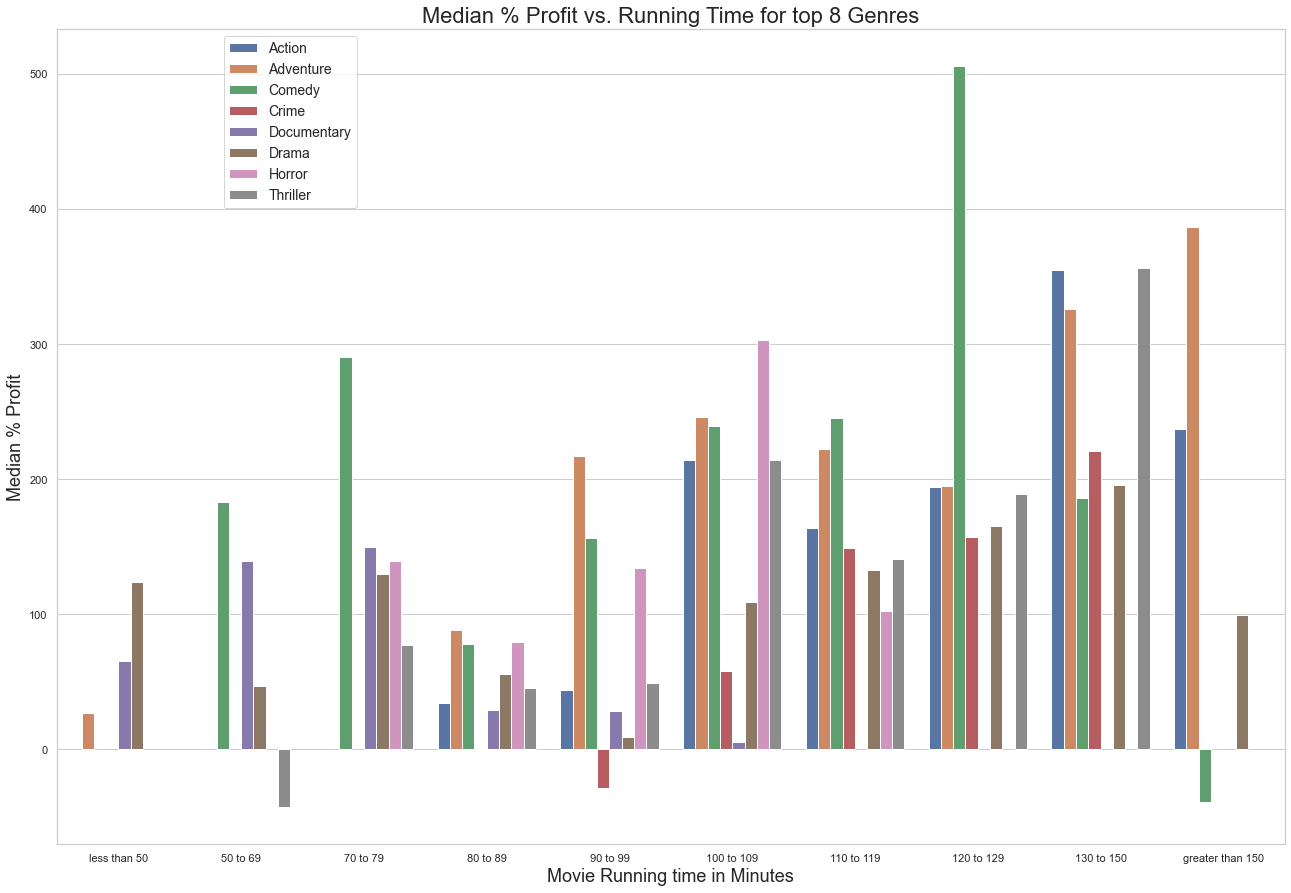

In [295]:
## Show Bar Plot Comparison to vividly depict most profitable running time for each genre. (For Median % Profit)
ax2 = sns.barplot(x='runtime_minutes', y='% Profit', hue='genre',
                  order = ["less than 50", "50 to 69", "70 to 79", "80 to 89", "90 to 99", "100 to 109"
                     , "110 to 119", "120 to 129", "130 to 150", "greater than 150"],
                    data=runtime_df_agg_med)
sns.set(rc={'figure.figsize':(22,15), 'figure.facecolor':'white'})
sns.set_theme(style="whitegrid")
ax2.set_title("Median % Profit vs. Running Time for top 8 Genres", size = 22)
ax2.set_xlabel("Movie Running time in Minutes", size = 18)
ax2.set_ylabel("Median % Profit", size = 18);
ax2.legend(bbox_to_anchor= (0.13, 1), fontsize = 14);

In [296]:
## Shows Top 5 % Profit and its genre.
runtime_df_agg_med.sort_values(by=['% Profit']).tail()

,genre,runtime_minutes,% Profit,Count
13,Adventure,130 to 150,326.0,57
3,Action,130 to 150,355.0,85
71,Thriller,130 to 150,356.0,37
18,Adventure,greater than 150,387.0,11
22,Comedy,120 to 129,506.0,41


According to the bar plot above, we can com up with some insightful anaylsis:
1. After plotting median data, analyzing by mean profit is likely misleading.
2. TOP 5 Most Profitable running time and its genre:
     1. Comedy with running time between 120 to 129 minutes. (Median Profit = 506%)
     2. Adventure with running time greater than 150 minutes. (Median Profit = 387%)
     3. Thriller with running time between 130 to 150 minutes. (Median Profit = 356%)
     4. Action with running time between 130 to 150 minutes. (Median Profit = 355%)
     5. Adventure with running time between 130 to 150 minutes. (Median Profit = 326%)
     
3. Top % Profit mostly come from genres with more than 120 minutes of running time.

In [297]:
final_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,total_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",1862019831,1531419831
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",2726949682,2426949682


## Figure out best season to release for Adventure Genre
From the previous analysis, we came up with following:
1. Adventure Genre is the most profitable genre.
2. Adventure Genre with its running time greater than 150 minutes is most profitable genre.

Now... what would be the most profitalbe season to release Adventure Genre?

In [298]:
## Clean up Data to prepare for the analysis.
## Separate Genres separated by comma in genres column into other columns.
genres_1 = genres[["release_date","primary_title","production_budget","total_profit","genre1"]]
genres_1.columns = ["release_date","primary_title","production_budget","total_profit","genre1"]

genres_2 = genres[["release_date","primary_title","production_budget","total_profit","genre2"]]
genres_2.columns = ["release_date","primary_title","production_budget","total_profit","genre1"]

genres_3 = genres[["release_date","primary_title","production_budget","total_profit","genre3"]]
genres_3.columns = ["release_date","primary_title","production_budget","total_profit","genre1"]

In [299]:
## Concatenate genre1, genre2, genre3 column in to one single column.
release_season_df = pd.concat([genres_1, genres_2, genres_3], axis=0)
## Change column name genre1 to genre
release_season_df = release_season_df.rename(columns = {"genre1" : "genre"})
## Add Profit % Column
release_season_df["% Profit"] = release_season_df["total_profit"] / release_season_df["production_budget"] * 100
## Drop all the other genres other than Adventure
release_season_df = release_season_df[release_season_df.genre == "Adventure"]
## Extract Month from the release date.
release_season_df['Release_Month'] = release_season_df['release_date'].str[:3]

In [300]:
release_season_df.head()

,release_date,primary_title,production_budget,total_profit,genre,% Profit,Release_Month
11,"Nov 24, 2010",Tangled,260000000,527299176,Adventure,202.807375,Nov
14,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,1070007136,Adventure,428.002854,Dec
15,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,968733710,Adventure,387.493484,Dec
16,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,950697409,Adventure,380.278964,Dec
40,"Jun 17, 2016",Finding Dory,200000000,1307510754,Adventure,653.755377,Jun


In [301]:
## Change Vlaues to Season instead of month.
for i, a in zip(release_season_df["Release_Month"], range(len(release_season_df)+1)):
    if i == "Sep" or i == "Oct" or i == "Nov":
        release_season_df["Release_Month"].iloc[a] = "Fall" 
    elif i == "Dec" or i == "Jan" or i == "Feb":
        release_season_df["Release_Month"].iloc[a] = "Winter"
    elif i == "Mar" or i == "Apr" or i == "May":
        release_season_df["Release_Month"].iloc[a] = "Spring"
    else:
        release_season_df["Release_Month"].iloc[a] = "Summer"

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [302]:
## Rename Release_Month Column to Release_Season
release_season_df = release_season_df.rename(columns={"Release_Month": "Release_Season"})
release_season_df

,release_date,primary_title,production_budget,total_profit,genre,% Profit,Release_Season
11,"Nov 24, 2010",Tangled,260000000,527299176,Adventure,202.807375,Fall
14,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,1070007136,Adventure,428.002854,Winter
15,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,968733710,Adventure,387.493484,Winter
16,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,950697409,Adventure,380.278964,Winter
40,"Jun 17, 2016",Finding Dory,200000000,1307510754,Adventure,653.755377,Summer
...,...,...,...,...,...,...,...
2883,"Dec 1, 2015",Shark Lake,2000000,-2000000,Adventure,-100.000000,Winter
2914,"Dec 31, 2013",Independence Daysaster,1800000,-1800000,Adventure,-100.000000,Winter
3069,"Mar 21, 2008",The Hammer,850000,35276,Adventure,4.150118,Spring
3134,"Jun 28, 2013",Detention of the Dead,500000,-496444,Adventure,-99.288800,Summer


In [303]:
release_season_df_mean = pd.pivot_table(release_season_df, values = ["% Profit"], index = ["Release_Season"],
                                aggfunc= {"% Profit": np.mean})

In [304]:
release_season_df_median = pd.pivot_table(release_season_df, values = ["% Profit"], index = ["Release_Season"],
                                aggfunc= {"% Profit": np.median})

In [305]:
## Reset index to make it easier to graph.
release_season_df_mean1 = release_season_df_mean.reset_index()
release_season_df_median1 = release_season_df_median.reset_index()

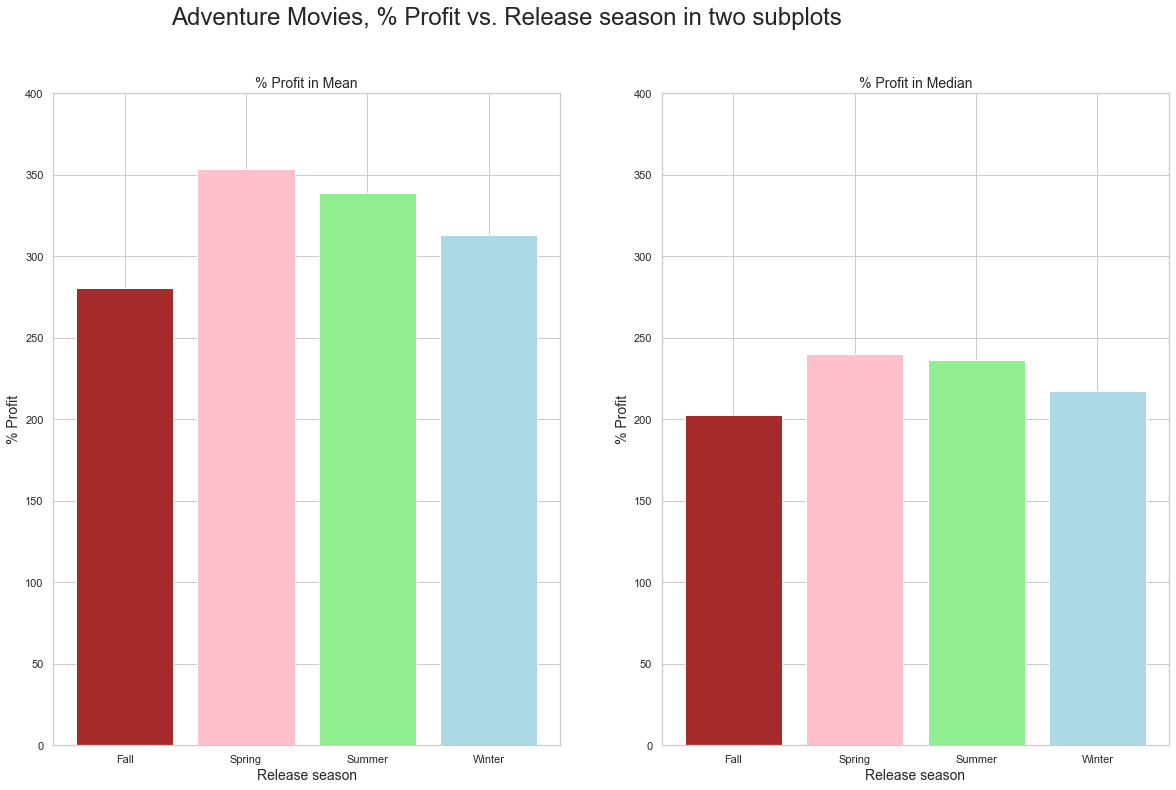

In [306]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(figsize = (20,12), ncols =2)

# Set different limits of x and y axes for subplots
ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)


# Plot bar graphs of Mean % Profit and Median % Profit vs. Release Seasson
ax1.bar(release_season_df_mean1["Release_Season"] , release_season_df_mean1["% Profit"],
        color = ["brown", "pink", "lightgreen", "lightblue"])
ax2.bar(release_season_df_median1["Release_Season"] , release_season_df_median1["% Profit"],
        color = ["brown", "pink", "lightgreen", "lightblue"])

# Add a title to the figure
fig.suptitle("Adventure Movies, % Profit vs. Release season in two subplots", fontsize=24, x=0.44)

# Add title to each subplots
ax1.set_title("% Profit in Mean", size = 14)
ax2.set_title("% Profit in Median", size = 14)

# Add x label names for each subplot
ax1.set_xlabel("Release season", size = 14)
ax1.set_ylabel("% Profit", size = 14)

# Add x label names for each subplot
ax2.set_xlabel("Release season", size = 14)
ax2.set_ylabel("% Profit", size = 14);

## Summary
Both % Profit in mean and median data agree that Spring is the most profitable season to release Adventure Movies!

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In conclusion, we came up with following criteria to focus on for Microsoft to show lucative movie release:
1. Genre: Adventure
2. Running time: more than 150 minutes
3. Target Release Season: Spring

## Analysis on 